# [ Facial Emotion Classification ]
## Machine Learning - KNN(PCA) / RandomForest / XGboost / LightGBM

In [1]:
import os, glob
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from joblib import dump, load

## Data Handling
- 기존의 감정분류 데이터셋은 사람별로 제각기 흩어져 있어 한 폴더에 모든 표정이미지 데이터를 모아보고자 한다.

In [4]:
Image_path = "D:/DeepLearning/Emotion/"
people_list = os.listdir(Image_path)

print ("people_list: {}".format(people_list))

people_list: ['0_9_감정분류_데이터셋', '10_19_감정분류_데이터셋', '20_29_감정분류_데이터셋', '30_39_감정분류_데이터셋', '40_49_감정분류_데이터셋', '50_59_감정분류_데이터셋', '60_69_감정분류_데이터셋', '70_79_감정분류_데이터셋', '80_89_감정분류_데이터셋', '90_99_감정분류_데이터셋']


In [5]:
people_path =[]
for i in people_list:
    people_path.append(Image_path+str(i))
    
people_path

['D:/DeepLearning/Emotion/0_9_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/20_29_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/30_39_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/40_49_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/50_59_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/60_69_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/70_79_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/80_89_감정분류_데이터셋',
 'D:/DeepLearning/Emotion/90_99_감정분류_데이터셋']

In [6]:
person_path = []
for i in people_path:
    person_list = os.listdir(i)
    for j in person_list:
        person_path.append(i + "/" + j)
        
person_path

['D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/001',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/002',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/003',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/004',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/005',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/006',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/007',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/008',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/009',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/010',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/011',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/012',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/013',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/014',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/015',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/016',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/017',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/018',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/019',
 'D:/DeepLearning/Emotion/20_29_감정분류_데이터셋/020',
 'D:/DeepLea

In [7]:
picture_path = []
for i in person_path:
    picture_list = os.listdir(i)[1]
    picture_path.append(i + '/' + picture_list)
    
picture_path

['D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/001/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/002/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/003/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/004/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/005/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/006/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/007/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/008/picture',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/009/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/010/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/011/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/012/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/013/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/014/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/015/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/016/picture',
 'D:/DeepLearning/Emotion/10_19_감정분류_데이터셋/017/picture',
 'D:/DeepLea

In [8]:
import shutil

file_path = []
for i in picture_path:
    file_list = os.listdir(i)
    for j in file_list:
        file_path.append(i + "/" + j)
        
file_path

['D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-00.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-01.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-02.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-03.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-04.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-05.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-06.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-07.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-08.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-09.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-10.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-11.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-12.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류_데이터셋/000/picture/000-ang-13.JPG',
 'D:/DeepLearning/Emotion/0_9_감정분류

- 위의 결과로 얻어진 모든 이미지데이터의 디렉토리를 찾아 지정된 폴더로 복사한다.

In [9]:
# 실행되었다면 이미 폴더에 데이터가 복사되었으므로 재실행할 필요가 없다.
# for i in file_path:
#     shutil.copy(i,'D:/DeepLearning/face_emotion')

#### 각 이미지 데이터에 지정된 감정코드를 이용해 Label을 만들어보자

In [10]:
emotion_path = "D:/DeepLearning/face_emotion/"
emotion_list = os.listdir(emotion_path)

emotion_list

['000-ang-00.JPG',
 '000-ang-01.JPG',
 '000-ang-02.JPG',
 '000-ang-03.JPG',
 '000-ang-04.JPG',
 '000-ang-05.JPG',
 '000-ang-06.JPG',
 '000-ang-07.JPG',
 '000-ang-08.JPG',
 '000-ang-09.JPG',
 '000-ang-10.JPG',
 '000-ang-11.JPG',
 '000-ang-12.JPG',
 '000-ang-13.JPG',
 '000-ang-14.JPG',
 '000-ang-15.JPG',
 '000-ang-16.JPG',
 '000-dis-00.JPG',
 '000-dis-01.JPG',
 '000-dis-02.JPG',
 '000-dis-03.JPG',
 '000-dis-04.JPG',
 '000-dis-05.JPG',
 '000-dis-06.JPG',
 '000-dis-07.JPG',
 '000-dis-08.JPG',
 '000-dis-09.JPG',
 '000-dis-10.JPG',
 '000-dis-11.JPG',
 '000-dis-12.JPG',
 '000-dis-13.JPG',
 '000-dis-14.JPG',
 '000-fea-00.JPG',
 '000-fea-01.JPG',
 '000-fea-02.JPG',
 '000-fea-03.JPG',
 '000-fea-04.JPG',
 '000-fea-05.JPG',
 '000-fea-06.JPG',
 '000-fea-07.JPG',
 '000-fea-08.JPG',
 '000-fea-09.JPG',
 '000-fea-10.JPG',
 '000-fea-11.JPG',
 '000-fea-12.JPG',
 '000-fea-13.JPG',
 '000-fea-14.JPG',
 '000-hap-00.JPG',
 '000-hap-01.JPG',
 '000-hap-02.JPG',
 '000-hap-03.JPG',
 '000-hap-04.JPG',
 '000-hap-05

In [11]:
labels = []
for i in emotion_list:
    labels.append(i.split('-')[1])
    
labels

['ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'fea',
 'hap',
 'hap',
 'hap',
 'hap',
 'hap',
 'hap',
 'hap',
 'hap',
 'hap',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'sur',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'ang',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',
 'dis',


In [12]:
# 라벨 인코더 생성
encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(labels)
labels_ecd = encoder.transform(labels)

In [13]:
labels_ecd

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [14]:
dump(labels_ecd,'labels_ecd.pkl')

['labels_ecd.pkl']

In [2]:
labels_ecd_p = load('labels_ecd.pkl')
labels_ecd_p

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [25]:
# emotion_df = pd.DataFrame(data={'emotion' : labels, 'labels' : labels_ecd})
# emotion_df = emotion_df.drop_duplicates()
# emotion_df = emotion_df.reset_index(drop=True)
# emotion_df

In [26]:
# emotion_df.to_csv('emotion_df.csv',index=False)

In [3]:
emotion_df = pd.read_csv('emotion_df.csv')
emotion_df

,emotion,labels
0,ang,0
1,dis,1
2,fea,2
3,hap,3
4,neu,4
5,sad,5
6,sur,6


#### 모든 이미지 데이터를 흑백으로 컨버팅하여 2차원데이터로 변환

In [4]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

In [16]:
# image_w = 64
# image_h = 64

# data = []

# for i in file_path:
#         img = Image.open(i)
#         img = img.convert("L")
#         #img = img.resize(image_w * image_h)
#         img = img.resize((image_w, image_h))

#         img_data = np.asarray(img)

#         data.append(img_data)
        
# data

#### 2D로 이뤄진 array배열을 1D로 변환하여 담는다

In [17]:
# data_f = []
# for i in range(0,len(data)):
#     data_f.append(data[i].flatten())
    
# data_f[0]

In [18]:
# dump(data_f, 'data_f.pkl')

In [5]:
data_f_p = load('data_f.pkl')
data_f_p

[array([117, 118, 128, ..., 120, 120, 107], dtype=uint8),
 array([125, 130, 132, ..., 123, 124, 121], dtype=uint8),
 array([121, 129, 130, ..., 121, 123, 116], dtype=uint8),
 array([127, 124, 126, ..., 114, 126, 118], dtype=uint8),
 array([117, 131, 122, ..., 118, 128, 123], dtype=uint8),
 array([117, 125, 127, ..., 116, 116, 107], dtype=uint8),
 array([133, 123, 133, ..., 123, 124, 109], dtype=uint8),
 array([112, 123, 125, ..., 115, 125, 120], dtype=uint8),
 array([124, 123, 124, ..., 113, 120, 115], dtype=uint8),
 array([121, 125, 123, ..., 119, 118, 119], dtype=uint8),
 array([126, 126, 134, ..., 128, 130, 122], dtype=uint8),
 array([112, 124, 129, ..., 118, 119, 116], dtype=uint8),
 array([118, 126, 133, ..., 121, 122, 113], dtype=uint8),
 array([125, 129, 127, ..., 125, 123, 118], dtype=uint8),
 array([113, 122, 128, ..., 123, 123, 112], dtype=uint8),
 array([123, 124, 123, ..., 124, 119, 119], dtype=uint8),
 array([118, 124, 128, ..., 120, 119, 115], dtype=uint8),
 array([116, 1

In [26]:
len(data_f_p[0])

4096

In [27]:
(train_data, test_data, train_labels, test_labels) = train_test_split(np.array(data_f_p), labels_ecd_p, test_size=0.20, random_state=1234)

print(len(train_data))
print(len(test_data))

3924
982


In [28]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6]


In [39]:
train_data_p = load('train_data.pkl')
train_data_p

array([[ 21,  21,  23, ...,  14,  15,  15],
       [ 25,  23,  25, ...,  19,  19,  19],
       [169, 168, 169, ..., 153, 157, 153],
       ...,
       [154, 158, 159, ..., 152, 148, 148],
       [171, 175, 176, ..., 157, 153, 162],
       [ 24,  23,  23, ...,  12,  14,  14]], dtype=uint8)

In [41]:
test_data_p = load('test_data.pkl')
test_data_p

array([[156, 157, 155, ..., 147, 145, 144],
       [154, 160, 161, ..., 153, 152, 151],
       [161, 164, 163, ..., 146, 145, 147],
       ...,
       [166, 162, 163, ..., 164, 158, 159],
       [162, 167, 165, ..., 148, 149, 150],
       [169, 172, 162, ..., 152, 153, 154]], dtype=uint8)

In [6]:
train_labels_p = load('train_labels.pkl')
train_labels_p

array([5, 3, 2, ..., 4, 2, 1], dtype=int64)

In [7]:
test_labels_p = load('test_labels.pkl')
test_labels_p

array([6, 2, 4, 2, 0, 2, 6, 4, 4, 6, 1, 3, 0, 2, 3, 3, 1, 2, 6, 6, 6, 5,
       6, 3, 2, 0, 0, 0, 6, 6, 1, 2, 2, 0, 5, 6, 5, 0, 1, 6, 0, 6, 3, 5,
       2, 5, 1, 5, 6, 1, 5, 2, 0, 6, 2, 3, 2, 0, 1, 4, 1, 1, 3, 4, 3, 5,
       2, 1, 1, 5, 3, 2, 1, 4, 0, 3, 4, 4, 1, 5, 6, 0, 5, 6, 3, 2, 4, 0,
       3, 5, 5, 1, 1, 1, 4, 6, 0, 4, 4, 0, 1, 5, 0, 5, 1, 5, 5, 3, 5, 5,
       3, 0, 3, 2, 3, 4, 3, 6, 0, 1, 4, 1, 4, 5, 5, 3, 6, 4, 0, 6, 6, 1,
       2, 1, 1, 6, 3, 3, 1, 0, 2, 0, 2, 1, 5, 6, 3, 5, 4, 2, 5, 4, 6, 2,
       6, 1, 2, 3, 6, 6, 3, 0, 4, 4, 6, 6, 6, 2, 2, 2, 4, 2, 5, 4, 6, 1,
       5, 4, 0, 2, 5, 0, 6, 4, 6, 3, 4, 4, 6, 1, 6, 1, 0, 4, 0, 6, 0, 6,
       5, 4, 0, 2, 0, 6, 4, 3, 2, 1, 5, 2, 5, 0, 3, 2, 5, 5, 3, 3, 4, 2,
       5, 2, 5, 5, 2, 3, 1, 3, 5, 5, 0, 6, 6, 2, 1, 0, 4, 1, 4, 4, 5, 6,
       3, 5, 3, 5, 5, 0, 0, 6, 0, 1, 1, 4, 2, 1, 6, 0, 6, 4, 4, 6, 4, 0,
       0, 5, 0, 4, 3, 0, 4, 1, 6, 6, 0, 0, 3, 5, 2, 0, 5, 1, 6, 5, 1, 1,
       2, 0, 1, 3, 0, 1, 3, 1, 6, 5, 6, 4, 1, 6, 6,

In [23]:
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 624]
 [  1 612]
 [  2 554]
 [  3 519]
 [  4 534]
 [  5 566]
 [  6 515]]


In [24]:
unique, counts = np.unique(test_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 163]
 [  1 141]
 [  2 149]
 [  3 121]
 [  4 121]
 [  5 135]
 [  6 152]]


In [25]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))

(4096,)
64.0


In [26]:
print(test_data[0].shape)
print(np.sqrt(test_data[0].shape[0]))

(4096,)
64.0


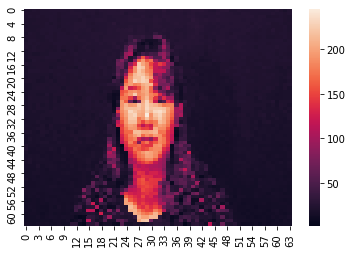

In [27]:
idx = 0
# 보고자 하는 데이터의 index
image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))

### Normalization - Max/Min  method

##### new x = (x - x_min) / (x_max - x_min)
            
            from sklearn.preprocessing import MinMaxscaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.transform(test_data)

## KNN (전체 데이터 기본 분석)

In [9]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

0.5904673079422851
0.49439165475107244
0.4469956453919147
0.3922010269075783
The optimal number of neighbors is 1


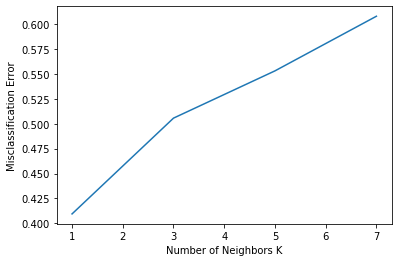

Process Time : 151.06290769577026


In [50]:
t1 = time.time()
myList = list(range(1,8))

neighbors = list(filter(lambda x : x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    scores = cross_val_score(knn, train_norm, train_labels, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(scores.mean())
    
# changing to misclassification error
MSE = [1- x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" %optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

t2 = time.time()
print("Process Time : "+str(t2-t1))

- Neighbors K 의 값이 1일 때 Error 값이 가장 작게 나오는 것으로 확인되지만 K값의 설정을 1개로 할 경우에 과적합의 문제가 발생한다.
- 위의 결과를 바탕으로 RandomGridSearchCV를 이용하여 parameter값을 조정하여 재학습을 시켜보도록 하자.

In [10]:
from sklearn.model_selection import KFold
# shuffle는 순서에 대해서도 섞에서 랜덤하게 세팅
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [28]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors':[1,3,5,7,9],
    'weights':['uniform'],
    'leaf_size' : [20,60,100]
}
n_iter_search = 10
knn_rgs = RandomizedSearchCV(knn, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

knn_rgs.fit(train_norm, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'leaf_size': [20, 60, 100],
                                        'n_neighbors': [1, 3, 5, 7, 9],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [29]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
knn_rgs.best_score_

0.585881753312946

- 결과적인 큰 의미의 변화는 없는 것으로 보인다.
- 실제 test데이터로 결과 값을 살펴보자

In [31]:
knn_best = knn_rgs.best_estimator_

knn_predictions = knn_best.predict(test_norm)
accuracy = accuracy_score(test_labels, knn_predictions)
print("knn에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

knn에서 RandomGridSearchCV로 찾은 결과 : 0.6344


## PCA(주 성분 분석)
- 이미지 데이터의 전체적인 데이터의 변화를 바탕으로 가장 변화폭이 큰 부분을 떼어내서 모델링을 돌려보려고 한다.
- 변화폭이 적은 주변 배경들을 최대한 배제하고 얼굴 주변으로 차원을 축소하여 점검한다.

In [12]:
from sklearn.decomposition import PCA

In [33]:
num_comp = 300
pca = PCA(n_components=num_comp)

In [34]:
pca.fit(train_norm)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
# determine amount of variance explained by componenets
np.sum(pca.explained_variance_ratio_)

0.9840808302735039

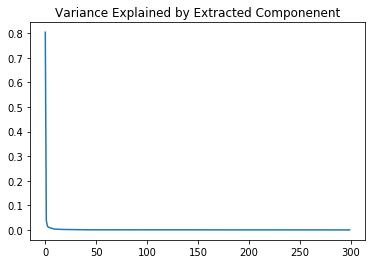

In [36]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

- 일정 값을 기점으로 분산비율의 결과가 큰 폭으로 떨어져 차원축소의 조정이 큰 의미는 없어보인다.

In [37]:
# extract the features

num_comp = 300
pca = PCA(n_components=num_comp)

train_ext = pca.fit_transform(train_norm)
print(train_ext.shape)
# transform the test data using the exisiting parameters
test_ext = pca.transform(test_norm)
print(test_ext.shape)

(3924, 300)
(982, 300)


In [38]:
dump(train_ext, 'train_ext.pkl')

['train_ext.pkl']

In [13]:
train_ext_p = load('train_ext.pkl')
train_ext_p

array([[-1.87740340e+01, -3.06843801e+00,  2.44016732e+00, ...,
        -4.40796623e-02, -5.73685176e-02,  3.84630610e-02],
       [-1.81171519e+01, -4.45013328e+00,  4.04015748e+00, ...,
         6.58323402e-02, -2.10391670e-01, -6.75079493e-02],
       [ 1.94459339e+01,  4.76188838e-01,  2.14068750e+00, ...,
        -3.05430087e-01, -4.76044703e-01, -2.23083787e-01],
       ...,
       [ 1.61751485e+01, -1.45508631e+00, -4.15479822e-01, ...,
        -3.24877734e-02, -2.81107656e-02,  3.42029198e-03],
       [ 1.75583335e+01, -3.77901662e+00, -6.50878820e-01, ...,
         1.41536585e-01,  8.42403545e-02,  5.89896499e-02],
       [-1.76987517e+01, -4.29840499e+00, -1.42245772e+00, ...,
        -2.24455290e-01, -1.29087294e-01,  1.20040204e-01]])

In [40]:
dump(test_ext, 'test_ext.pkl')

['test_ext.pkl']

In [14]:
test_ext_p = load('test_ext.pkl')
test_ext_p

array([[ 1.69751344e+01,  3.05706059e+00,  2.11575424e-01, ...,
         2.99397122e-03, -7.42361260e-03,  1.20912052e-01],
       [ 1.72987518e+01, -1.49781948e+00,  7.75714460e-01, ...,
         4.83678605e-03, -2.55890650e-02, -1.04063031e-01],
       [ 1.78490940e+01, -2.51384671e+00, -2.39376620e+00, ...,
        -3.12904967e-02,  1.56047991e-02, -1.22647963e-01],
       ...,
       [ 1.81880711e+01, -2.44982975e+00, -1.26159034e-01, ...,
         7.31442024e-02,  3.90652980e-02, -9.42757829e-02],
       [ 1.77668476e+01, -2.54245371e+00,  8.99725924e-01, ...,
         5.75867131e-02, -4.31318406e-02,  3.12567130e-02],
       [ 1.87294950e+01,  1.51344584e+00,  7.06340402e-01, ...,
         1.94734491e-02,  9.92834781e-03,  5.85228740e-02]])

In [43]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors':[1,3,5,7,9],
    'weights':['uniform'],
    'leaf_size' : [20,60,100]
}
n_iter_search = 10
knn_rgs = RandomizedSearchCV(knn, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

knn_rgs.fit(train_ext, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.9s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'leaf_size': [20, 60, 100],
                                        'n_neighbors': [1, 3, 5, 7, 9],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [44]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
knn_rgs.best_score_

0.5848644871961524

In [19]:
# knn_best = knn_rgs.best_estimator_

knn_predictions = knn_best_p.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, knn_predictions)
print("knn에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

knn에서 RandomGridSearchCV로 찾은 결과 : 0.6405


In [47]:
dump(knn_best, 'knn_best.pkl')

['knn_best.pkl']

In [15]:
knn_best_p = load('knn_best.pkl')
knn_best_p

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
knn_best_p.predict_proba(test_ext_p)[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [17]:
knn_best_p.predict(test_ext_p)[0]

0

- PCA를 통한 모델링의 결과도 기존과 대비하여 두드러진 변화폭은 발생하지 않았다.

## PCA를 통해 축소한 데이터를 이용하여 다른 분류모델로 돌려보고자 한다.
- RandomForest / XGBoost / LinghtGBM 

In [20]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import math

## RandomForest

In [102]:
RF = RandomForestClassifier(n_jobs=-1, random_state=1234)
parameters = {
    'n_estimators':[300,500,700,1000],
    'max_depth':[5,10,15,20],
    'max_features':[5,10,30,100,200,290]
}
n_iter_search = 10
RF_rgs = RandomizedSearchCV(RF, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

RF_rgs.fit(train_ext_p, train_labels_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 20.9min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                

In [103]:
RF_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=100,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [104]:
RF_rgs.best_score_

0.520387040166385

In [106]:
RF_best = RF_rgs.best_estimator_

RF_predictions = RF_best.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, RF_predictions)
print("RF에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

RF에서 RandomGridSearchCV로 찾은 결과 : 0.5621


In [107]:
dump(RF_best, 'RF_best.pkl')

['RF_best.pkl']

In [21]:
RF_best_p = load('RF_best.pkl')
RF_best_p

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=100,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [22]:
RF_best_p.predict_proba(test_ext_p)[0]

array([0.22403264, 0.14196115, 0.14564023, 0.10137649, 0.14409689,
       0.14007614, 0.10281645])

In [23]:
RF_predictions_p = RF_best_p.predict(test_ext_p)
RF_predictions_p

array([0, 2, 4, 4, 2, 2, 6, 4, 4, 6, 1, 3, 0, 0, 3, 1, 0, 2, 5, 0, 4, 5,
       2, 3, 6, 2, 0, 0, 6, 6, 5, 0, 2, 0, 5, 1, 0, 0, 0, 2, 1, 3, 3, 4,
       6, 1, 1, 1, 2, 1, 4, 2, 6, 6, 0, 3, 5, 0, 1, 4, 1, 1, 3, 0, 3, 5,
       0, 1, 1, 5, 6, 5, 1, 3, 0, 6, 4, 4, 1, 3, 6, 0, 6, 3, 3, 3, 5, 1,
       3, 5, 4, 1, 1, 3, 4, 6, 2, 4, 4, 0, 0, 5, 2, 5, 1, 5, 5, 3, 5, 0,
       1, 0, 3, 0, 4, 4, 3, 6, 1, 1, 0, 1, 3, 5, 1, 0, 2, 4, 0, 6, 6, 1,
       6, 0, 0, 0, 6, 3, 0, 0, 2, 0, 0, 1, 5, 5, 1, 2, 6, 6, 5, 4, 6, 0,
       4, 1, 6, 3, 0, 3, 3, 0, 6, 3, 1, 6, 6, 2, 2, 2, 3, 2, 5, 4, 6, 1,
       5, 4, 0, 3, 5, 1, 3, 6, 6, 0, 4, 4, 5, 0, 1, 1, 0, 6, 0, 5, 0, 3,
       5, 4, 0, 1, 0, 6, 4, 4, 2, 2, 5, 2, 5, 0, 2, 2, 6, 4, 2, 3, 4, 2,
       5, 0, 5, 0, 4, 6, 1, 3, 0, 6, 0, 3, 6, 1, 1, 6, 4, 1, 0, 6, 5, 6,
       6, 5, 3, 5, 5, 0, 1, 6, 0, 1, 0, 2, 6, 2, 0, 2, 0, 0, 4, 6, 4, 0,
       0, 5, 0, 4, 3, 0, 4, 0, 6, 2, 0, 0, 3, 5, 2, 0, 0, 1, 6, 5, 6, 1,
       2, 0, 1, 3, 0, 6, 3, 5, 6, 5, 6, 4, 0, 6, 2,

In [30]:
print('Random Forest 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == RF_predictions_p)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

Random Forest 감정별 정답률
emotion ang :  0.6871165644171779
emotion dis :  0.5319148936170213
emotion fea :  0.5033557046979866
emotion hap :  0.5950413223140496
emotion neu :  0.5785123966942148
emotion sad :  0.5777777777777777
emotion sur :  0.4605263157894737


Real Label :  sur
Model Label :  ang


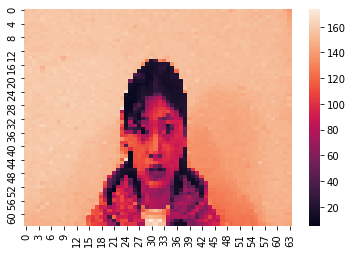

In [42]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][RF_best_p.predict(test_ext_p)[idx]])


## XGBoost

In [60]:
xgb = XGBClassifier(n_jobs=-1, random_state=1234)
parameters = {
    'n_estimators':[300,500,700,1000],
    'max_depth':[5,10,15,20],
    'learning_rate':[0.01,0.1,0.5,1,10]
}
n_iter_search = 10
xgb_rgs = RandomizedSearchCV(xgb, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

xgb_rgs.fit(train_ext, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 55.5min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective...
                                           random_state=1234, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
              

In [61]:
xgb_rgs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
xgb_rgs.best_score_

0.48674821610601426

In [63]:
xgb_best = xgb_rgs.best_estimator_

xgb_predictions = xgb_best.predict(test_ext)
accuracy = accuracy_score(test_labels, xgb_predictions)
print("XGB에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

XGB에서 RandomGridSearchCV로 찾은 결과 : 0.5428


In [64]:
dump(xgb_best, 'xgb_best.pkl')

['xgb_best.pkl']

In [31]:
xgb_best_p = load('xgb_best.pkl')
xgb_best_p

C:\Users\howki\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\howki\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, n_estimators=500, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
xgb_best_p.predict_proba(test_ext_p)[0]

array([0.30844942, 0.03383985, 0.07346475, 0.0270787 , 0.44532   ,
       0.08864383, 0.02320343], dtype=float32)

In [33]:
xgb_best_p.predict(test_ext_p)[0]

4

In [34]:
xgb_predictions_p = xgb_best_p.predict(test_ext_p)
xgb_predictions_p

array([4, 2, 4, 0, 1, 2, 6, 4, 1, 6, 1, 3, 0, 0, 6, 4, 6, 3, 4, 0, 6, 5,
       2, 3, 6, 1, 0, 0, 6, 6, 5, 5, 2, 0, 5, 1, 0, 0, 6, 4, 1, 2, 3, 4,
       4, 1, 3, 1, 0, 1, 4, 2, 6, 6, 0, 6, 5, 1, 1, 4, 1, 5, 3, 0, 3, 5,
       2, 1, 1, 5, 6, 5, 1, 3, 5, 5, 2, 4, 1, 3, 4, 0, 6, 6, 3, 3, 5, 1,
       3, 5, 4, 1, 1, 3, 4, 6, 4, 2, 4, 6, 3, 5, 1, 5, 1, 5, 5, 3, 5, 0,
       1, 3, 3, 1, 4, 4, 3, 6, 0, 1, 0, 0, 3, 0, 1, 3, 1, 4, 1, 6, 6, 1,
       6, 0, 0, 1, 6, 3, 0, 0, 2, 0, 3, 1, 5, 0, 6, 0, 3, 6, 5, 4, 1, 4,
       4, 0, 0, 3, 1, 6, 3, 3, 6, 3, 1, 6, 6, 0, 2, 2, 3, 5, 5, 4, 6, 1,
       5, 4, 6, 1, 5, 1, 0, 1, 6, 2, 4, 4, 5, 0, 0, 2, 0, 4, 0, 4, 0, 2,
       0, 4, 0, 1, 0, 6, 4, 4, 2, 1, 5, 1, 5, 0, 3, 2, 3, 0, 0, 3, 4, 2,
       5, 3, 5, 5, 4, 6, 1, 3, 1, 6, 0, 6, 3, 1, 1, 6, 4, 1, 0, 6, 5, 6,
       6, 5, 3, 5, 5, 0, 4, 6, 0, 1, 1, 2, 6, 0, 0, 0, 6, 0, 3, 3, 4, 0,
       0, 5, 0, 0, 3, 0, 4, 5, 6, 2, 0, 1, 3, 0, 3, 0, 0, 0, 6, 5, 1, 4,
       2, 6, 1, 1, 0, 4, 3, 5, 6, 5, 6, 4, 6, 6, 4,

In [44]:
print('XGBoost 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == xgb_predictions_p)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

XGBoost 감정별 정답률
emotion ang :  0.5337423312883436
emotion dis :  0.5106382978723404
emotion fea :  0.46308724832214765
emotion hap :  0.5950413223140496
emotion neu :  0.4628099173553719
emotion sad :  0.5703703703703704
emotion sur :  0.45394736842105265


Real Label :  sur
Model Label :  neu


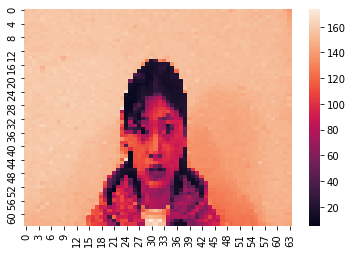

In [43]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][xgb_best_p.predict(test_ext_p)[idx]])


## LightGBM

In [68]:
lgbm = LGBMClassifier(n_jobs=-1, random_state=1234)
parameters = {
    'n_estimators':[300,500,700,1000],
    'max_depth':[5,10,15,20],
    'learning_rate':[0.01,0.1,0.5,1,10]
}
n_iter_search = 10
lgbm_rgs = RandomizedSearchCV(lgbm, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

lgbm_rgs.fit(train_ext, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 33.5min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, object...
                                            random_state=1234, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            s

In [69]:
lgbm_rgs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [70]:
lgbm_rgs.best_score_

0.5030581039755352

In [71]:
lgbm_best = lgbm_rgs.best_estimator_

lgbm_predictions = lgbm_best.predict(test_ext)
accuracy = accuracy_score(test_labels, lgbm_predictions)
print("LGBM에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

LGBM에서 RandomGridSearchCV로 찾은 결과 : 0.5631


In [72]:
dump(lgbm_best, 'lgbm_best.pkl')

['lgbm_best.pkl']

In [45]:
lgbm_best_p = load('lgbm_best.pkl')
lgbm_best_p

C:\Users\howki\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [46]:
lgbm_best_p.predict_proba(test_ext_p)[0]

array([0.07181709, 0.00475226, 0.00552525, 0.00148216, 0.85830865,
       0.05699347, 0.00112112])

In [47]:
lgbm_best_p.predict(test_ext_p)[0]

4

In [48]:
lgbm_predictions_p = lgbm_best_p.predict(test_ext_p)
lgbm_predictions_p

array([4, 2, 4, 4, 2, 2, 0, 4, 4, 6, 1, 1, 2, 0, 4, 1, 6, 5, 4, 0, 4, 5,
       2, 3, 6, 1, 5, 0, 6, 6, 5, 0, 2, 0, 5, 1, 0, 0, 6, 6, 1, 3, 3, 4,
       4, 1, 3, 2, 5, 1, 1, 2, 6, 6, 0, 4, 5, 0, 1, 4, 1, 5, 3, 0, 3, 5,
       2, 1, 1, 5, 6, 5, 1, 3, 0, 5, 0, 4, 1, 3, 5, 0, 6, 6, 3, 3, 5, 1,
       3, 5, 1, 1, 1, 4, 4, 6, 2, 2, 4, 0, 3, 5, 1, 5, 1, 5, 5, 3, 5, 0,
       1, 0, 3, 1, 4, 4, 4, 6, 1, 5, 2, 1, 3, 0, 1, 3, 1, 4, 2, 6, 6, 1,
       1, 0, 0, 1, 3, 3, 0, 0, 2, 0, 1, 1, 5, 5, 3, 2, 3, 5, 5, 4, 0, 4,
       1, 1, 0, 1, 5, 3, 3, 0, 6, 3, 1, 1, 6, 0, 2, 0, 3, 5, 5, 4, 6, 1,
       5, 4, 2, 3, 5, 1, 0, 1, 6, 5, 4, 4, 4, 0, 0, 2, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 2, 0, 6, 4, 4, 2, 1, 5, 2, 5, 0, 3, 2, 3, 4, 0, 3, 4, 2,
       5, 3, 5, 6, 1, 6, 1, 3, 2, 6, 0, 6, 4, 2, 1, 6, 4, 1, 0, 6, 5, 6,
       6, 5, 3, 5, 5, 0, 4, 6, 0, 1, 1, 0, 6, 0, 0, 2, 6, 0, 4, 3, 4, 0,
       0, 5, 5, 0, 3, 0, 4, 0, 6, 2, 0, 1, 3, 4, 3, 0, 4, 1, 6, 5, 1, 4,
       2, 6, 1, 3, 0, 6, 6, 5, 6, 5, 6, 4, 0, 6, 6,

In [49]:
print('LightGBM 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == lgbm_predictions_p)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

LightGBM 감정별 정답률
emotion ang :  0.6012269938650306
emotion dis :  0.5106382978723404
emotion fea :  0.47651006711409394
emotion hap :  0.5950413223140496
emotion neu :  0.5371900826446281
emotion sad :  0.5481481481481482
emotion sur :  0.4407894736842105


Real Label :  sur
Model Label :  neu


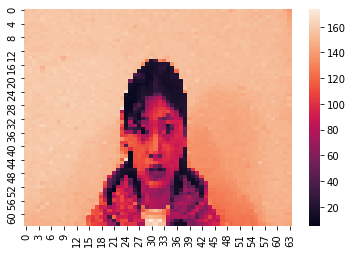

In [50]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][lgbm_best_p.predict(test_ext_p)[idx]])


## Voting Ensemble

In [51]:
from sklearn.ensemble import VotingClassifier

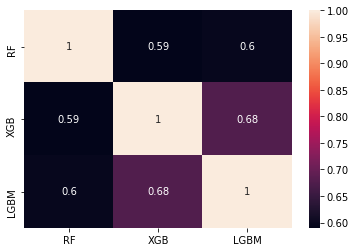

In [52]:
test_Survived_RF = pd.Series(RF_best_p.predict(test_ext_p), name='RF')
test_Survived_XGB = pd.Series(xgb_best_p.predict(test_ext_p), name='XGB')
test_Survived_LGBM = pd.Series(lgbm_best_p.predict(test_ext_p), name='LGBM')
ensemble_results = pd.concat([test_Survived_RF,test_Survived_XGB,test_Survived_LGBM],axis=1)
sns.heatmap(ensemble_results.corr(),annot=True)

In [53]:
eclf = VotingClassifier(estimators = [('RF', RF_best_p),('XGB', xgb_best_p),('LGBM', lgbm_best_p)], voting = 'hard')


eclf.fit(train_ext_p, train_labels_p)
eclf_pred = eclf.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, eclf_pred)
print("Hard Voting 으로 찾은 결과 : {0:.4f}".format(accuracy))

Hard Voting 으로 찾은 결과 : 0.5804


In [57]:
eclf_pred_p = eclf.predict(test_ext_p)

dump(eclf_pred_p,'eclf_pred_p.pkl')

['eclf_pred_p.pkl']

In [3]:
eclf_pred_pk = load('eclf_pred_p.pkl')
eclf_pred_pk

array([4, 2, 4, 4, 2, 2, 6, 4, 4, 6, 1, 3, 2, 0, 3, 1, 6, 2, 4, 0, 4, 5,
       2, 3, 6, 1, 5, 0, 6, 6, 0, 5, 2, 0, 5, 1, 5, 0, 0, 6, 1, 3, 3, 4,
       4, 1, 0, 1, 2, 1, 5, 2, 6, 6, 0, 3, 5, 0, 1, 4, 1, 0, 3, 0, 3, 5,
       0, 1, 1, 5, 6, 2, 1, 3, 0, 1, 4, 4, 1, 3, 6, 0, 6, 3, 3, 3, 5, 1,
       3, 5, 4, 1, 1, 3, 4, 6, 2, 4, 4, 0, 0, 5, 1, 5, 1, 5, 5, 3, 5, 0,
       1, 4, 3, 0, 4, 4, 3, 6, 1, 5, 6, 1, 3, 0, 1, 3, 1, 4, 0, 6, 6, 0,
       1, 0, 0, 0, 6, 3, 0, 0, 2, 0, 1, 1, 5, 4, 4, 0, 3, 3, 5, 4, 6, 4,
       1, 0, 1, 3, 0, 6, 3, 0, 6, 3, 1, 6, 6, 2, 2, 2, 3, 2, 5, 4, 6, 1,
       5, 4, 0, 1, 5, 0, 1, 6, 6, 0, 4, 4, 3, 0, 4, 1, 0, 4, 0, 4, 0, 2,
       5, 4, 0, 1, 0, 6, 4, 4, 2, 1, 5, 2, 5, 0, 3, 2, 6, 4, 0, 3, 4, 2,
       5, 3, 5, 5, 4, 6, 1, 3, 1, 6, 0, 6, 3, 0, 1, 6, 4, 1, 0, 6, 5, 6,
       6, 5, 3, 5, 5, 0, 1, 6, 0, 1, 0, 4, 6, 0, 0, 2, 6, 0, 4, 6, 4, 0,
       0, 5, 5, 0, 3, 0, 4, 0, 6, 2, 0, 1, 3, 5, 1, 0, 0, 1, 6, 5, 1, 1,
       2, 6, 1, 3, 0, 6, 3, 5, 6, 5, 6, 4, 0, 6, 0,

In [59]:
print('Voting 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == eclf_pred_pk)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

Voting 감정별 정답률
emotion ang :  0.6687116564417178
emotion dis :  0.5319148936170213
emotion fea :  0.5234899328859061
emotion hap :  0.6528925619834711
emotion neu :  0.5867768595041323
emotion sad :  0.6148148148148148
emotion sur :  0.4934210526315789


Real Label :  sur
Model Label :  neu


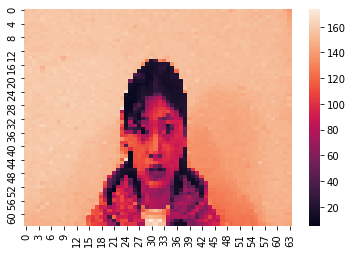

In [97]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][eclf_pred_pk[idx]])


## PCA vs TSNE

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

In [70]:
train_data_p.shape

(3924, 4096)

In [65]:
train_labels_p

array([5, 3, 2, ..., 4, 2, 1], dtype=int64)

In [71]:
feat_cols = [ 'pixel_'+str(i) for i in range(train_data_p.shape[1]) ]
df = pd.DataFrame(train_data_p,columns=feat_cols)
df['y'] = train_labels_p
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,y
0,21,21,23,22,23,23,24,24,24,24,...,14,11,14,12,14,14,14,15,15,5
1,25,23,25,28,28,23,24,26,27,28,...,18,17,18,20,18,19,19,19,19,3
2,169,168,169,172,168,172,171,171,169,175,...,155,151,154,153,155,158,153,157,153,2
3,161,165,166,167,162,167,168,170,164,163,...,9,9,8,13,13,9,9,144,133,6
4,23,24,25,24,23,25,27,27,24,26,...,15,17,16,13,13,13,17,16,14,6


In [72]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

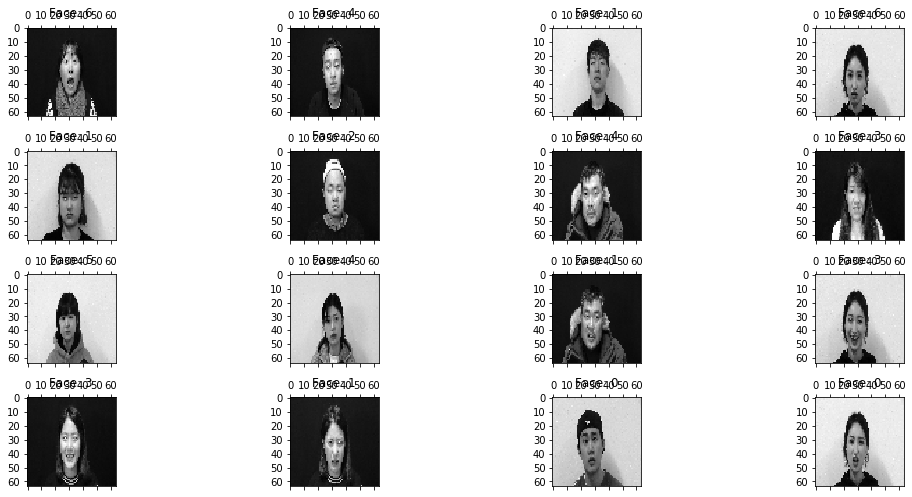

In [93]:
fig = plt.figure( figsize=(16,7) )
plt.gray()
for i in range(0,16):
    ax = fig.add_subplot(4,4,i+1, title="Face: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((64,64)).astype(float))
plt.tight_layout()

In [78]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73720633 0.05463232 0.02176726]


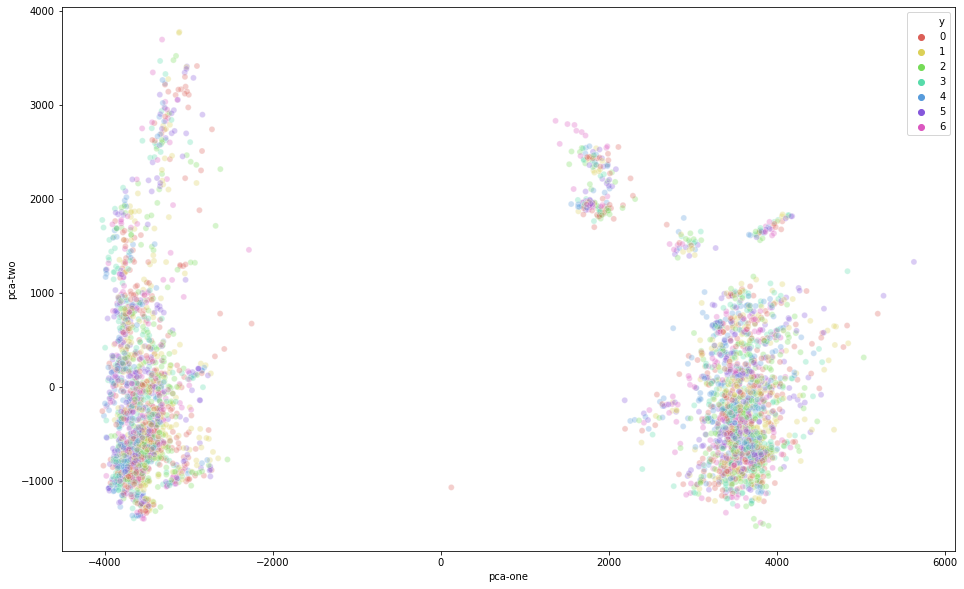

In [82]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [85]:
N = 2000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73880949 0.05364686 0.02185713]


In [86]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 2.435s...
[t-SNE] Computed neighbors for 2000 samples in 25.351s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 629.096301
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.863411
[t-SNE] KL divergence after 300 iterations: 0.937146
t-SNE done! Time elapsed: 30.238309383392334 seconds


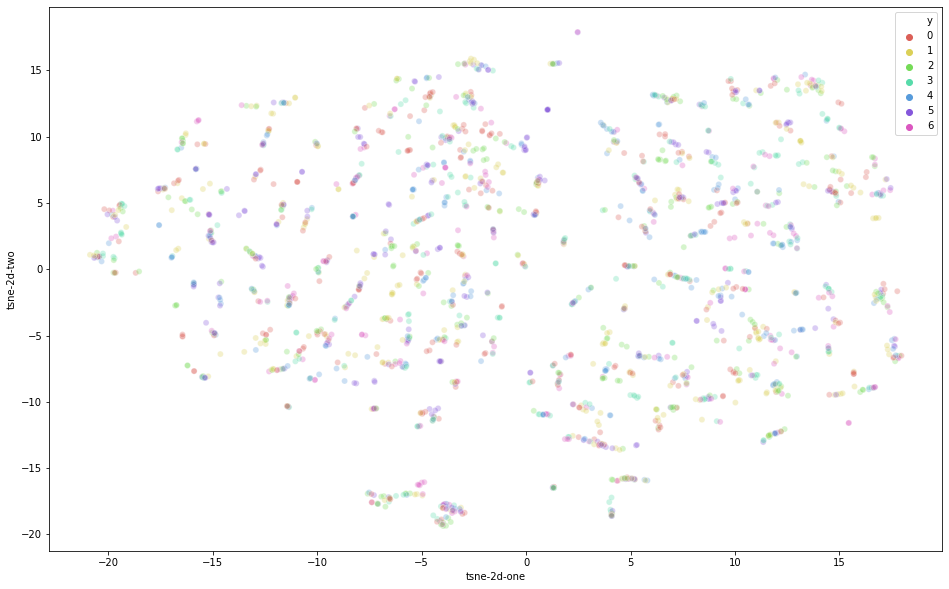

In [87]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# Focus Face Image - Machine Learning

In [1]:
import os, glob
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from joblib import dump, load

In [2]:
# img_path = "drive/My Drive/Colab Notebooks/focus_face/"
# model_dir_path = "drive/My Drive/Colab Notebooks/face_emtion_pkls/"
# print(os.listdir(img_path))
# print(os.listdir(model_dir_path))

['008-fea-00.JPG', '007-sur-01.JPG', '007-sad-01.JPG', '007-dis-03.JPG', '007-ang-06.JPG', '008-dis-06.JPG', '007-dis-01.JPG', '007-hap-00.JPG', '008-sad-00.JPG', '007-ang-02.JPG', '007-neu-05.JPG', '008-ang-05.JPG', '006-sur-01.JPG', '007-ang-04.JPG', '008-dis-07.JPG', '007-neu-03.JPG', '007-sad-05.JPG', '006-sad-00.JPG', '007-sad-00.JPG', '008-ang-01.JPG', '007-fea-04.JPG', '006-neu-08.JPG', '007-fea-05.JPG', '007-dis-02.JPG', '008-dis-00.JPG', '008-neu-04.JPG', '008-dis-04.JPG', '008-neu-00.JPG', '007-hap-04.JPG', '007-hap-03.JPG', '008-hap-05.JPG', '007-hap-05.JPG', '007-sur-04.JPG', '007-neu-02.JPG', '006-neu-06.JPG', '007-ang-00.JPG', '008-hap-00.JPG', '007-sur-02.JPG', '006-sur-05.JPG', '007-hap-01.JPG', '008-ang-04.JPG', '008-hap-02.JPG', '008-neu-05.JPG', '008-hap-3.JPG', '008-fea-01.JPG', '007-hap-02.JPG', '007-sad-03.JPG', '006-sur-04.JPG', '007-neu-04.JPG', '007-sad-07.JPG', '008-fea-02.JPG', '007-sad-02.JPG', '008-dis-08.JPG', '008-fea-04.JPG', '008-ang-02.JPG', '008-dis-0

In [3]:
# emotion_list = os.listdir(img_path)
# emotion_list.sort()
# emotion_list

['000-ang-00.JPG',
 '000-ang-01.JPG',
 '000-ang-02.JPG',
 '000-ang-03.JPG',
 '000-ang-04.JPG',
 '000-ang-05.JPG',
 '000-ang-06.JPG',
 '000-ang-07.JPG',
 '000-ang-08.JPG',
 '000-ang-09.JPG',
 '000-ang-10.JPG',
 '000-ang-11.JPG',
 '000-ang-12.JPG',
 '000-ang-13.JPG',
 '000-ang-14.JPG',
 '000-ang-15.JPG',
 '000-ang-16.JPG',
 '000-dis-00.JPG',
 '000-dis-01.JPG',
 '000-dis-02.JPG',
 '000-dis-03.JPG',
 '000-dis-04.JPG',
 '000-dis-05.JPG',
 '000-dis-06.JPG',
 '000-dis-07.JPG',
 '000-dis-08.JPG',
 '000-dis-09.JPG',
 '000-dis-10.JPG',
 '000-dis-11.JPG',
 '000-dis-12.JPG',
 '000-dis-13.JPG',
 '000-dis-14.JPG',
 '000-fea-00.JPG',
 '000-fea-01.JPG',
 '000-fea-02.JPG',
 '000-fea-03.JPG',
 '000-fea-04.JPG',
 '000-fea-05.JPG',
 '000-fea-06.JPG',
 '000-fea-07.JPG',
 '000-fea-08.JPG',
 '000-fea-09.JPG',
 '000-fea-10.JPG',
 '000-fea-11.JPG',
 '000-fea-12.JPG',
 '000-fea-13.JPG',
 '000-fea-14.JPG',
 '000-hap-00.JPG',
 '000-hap-01.JPG',
 '000-hap-02.JPG',
 '000-hap-03.JPG',
 '000-hap-04.JPG',
 '000-hap-05

In [4]:
# labels = []
# for i in emotion_list:
#     labels.append(i.split('-')[1])
    
# labels
# print(len(labels))

4792


In [0]:
# # 라벨 인코더 생성
# encoder = LabelEncoder()

# # X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
# encoder.fit(labels)
# labels_ecd = encoder.transform(labels)

In [6]:
# dump(labels_ecd, model_dir_path + 'labels_ecd.pkl')

['drive/My Drive/Colab Notebooks/face_emtion_pkls/labels_ecd.pkl']

In [2]:
# label_ecd_path = model_dir_path + 'labels_ecd.pkl'
# print(label_ecd_path)
labels_ecd_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/labels_ecd.pkl')
labels_ecd_p
print(len(labels_ecd_p))

4792


In [3]:
# emtion_df_path = model_dir_path + 'emotion_df.csv'

emotion_df = pd.read_csv('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/emotion_df.csv')
emotion_df

,emotion,labels
0,ang,0
1,dis,1
2,fea,2
3,hap,3
4,neu,4
5,sad,5
6,sur,6


In [9]:
# focus_path = []
# for i in emotion_list:
#     focus_path.append(img_path + i)

# focus_path

['drive/My Drive/Colab Notebooks/focus_face/000-ang-00.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-01.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-02.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-03.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-04.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-05.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-06.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-07.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-08.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-09.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-10.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-11.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-12.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-13.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-14.JPG',
 'drive/My Drive/Colab Notebooks/focus_face/000-ang-15.JPG',
 'drive/My Drive/Colab N

In [4]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

In [0]:
# image_w = 64
# image_h = 64

# data = []

# for i in focus_path:
#         img = Image.open(i)
#         img = img.convert("L")
#         img = img.resize((image_w , image_h))

#         img_data = np.asarray(img)

#         data.append(img_data)
        
# data

In [0]:
# data_f = []
# for i in range(0,len(data)):
#     data_f.append(data[i].flatten())
    
# data_f[0]

In [0]:
#  dump(data_f, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/data_f.pkl')

In [5]:
data_f_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/data_f.pkl')
data_f_p

[array([177, 154, 124, ..., 187, 187, 200], dtype=uint8),
 array([106,  49,  60, ..., 196, 200, 205], dtype=uint8),
 array([108,  53,  66, ...,  84, 165, 211], dtype=uint8),
 array([179, 152, 158, ..., 135, 159, 167], dtype=uint8),
 array([109,  51,  60, ..., 185, 201, 214], dtype=uint8),
 array([133,  78,  91, ..., 142, 131, 147], dtype=uint8),
 array([134,  68,  80, ..., 123, 121, 138], dtype=uint8),
 array([122,  58,  70, ..., 130, 120, 136], dtype=uint8),
 array([114,  54,  63, ..., 101, 136, 196], dtype=uint8),
 array([115,  55,  63, ..., 206, 185, 192], dtype=uint8),
 array([244, 212, 229, ..., 211, 208, 198], dtype=uint8),
 array([197, 178, 180, ..., 116, 106, 200], dtype=uint8),
 array([181, 147, 158, ...,  87,  84, 105], dtype=uint8),
 array([196, 158, 148, ..., 193, 197, 200], dtype=uint8),
 array([171, 146, 138, ..., 117, 114, 132], dtype=uint8),
 array([180, 146, 166, ..., 182, 178, 186], dtype=uint8),
 array([185, 158,  76, ..., 102, 101, 126], dtype=uint8),
 array([169, 1

In [6]:
len(data_f_p)

4792

In [0]:
# (train_data, test_data, train_labels, test_labels) = train_test_split(np.array(data_f_p), labels_ecd_p, test_size=0.20, random_state=1234)

# print(len(train_data))
# print(len(test_data))

In [0]:
# dump(train_data, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/train_data.pkl')
# dump(test_data, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/test_data.pkl')
# dump(train_labels, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/train_labels.pkl')
# dump(test_labels, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/test_labels.pkl')

In [7]:
train_data_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/train_data.pkl')
test_data_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/test_data.pkl')
train_labels_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/train_labels.pkl')
test_labels_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/test_labels.pkl')

In [8]:
print(np.unique(train_labels_p))

[0 1 2 3 4 5 6]


In [9]:
unique, counts = np.unique(train_labels_p, return_counts=True)
print(np.asarray((unique, counts)).T)
print()
unique, counts = np.unique(test_labels_p, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 607]
 [  1 591]
 [  2 542]
 [  3 510]
 [  4 514]
 [  5 554]
 [  6 515]]

[[  0 164]
 [  1 145]
 [  2 142]
 [  3 120]
 [  4 131]
 [  5 124]
 [  6 133]]


In [10]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
print(train_data_p[0].shape)
print(np.sqrt(train_data_p[0].shape[0]))
print()
print(test_data_p[0].shape)
print(np.sqrt(test_data_p[0].shape[0]))


(4096,)
64.0

(4096,)
64.0


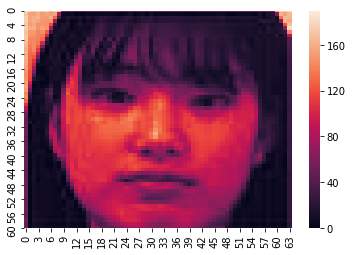

In [11]:
idx = 0
# 보고자 하는 데이터의 index
image_data = train_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# min_max_scaler = MinMaxScaler()
# train_norm = min_max_scaler.fit_transform(train_data_p)
# test_norm = min_max_scaler.transform(test_data_p)

In [13]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [14]:
from sklearn.model_selection import KFold
# shuffle는 순서에 대해서도 섞에서 랜덤하게 세팅
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)

## PCA

In [0]:
# num_comp = 150
# pca = PCA(n_components=num_comp)

# pca.fit(train_norm)

In [0]:
# determine amount of variance explained by componenets
# np.sum(pca.explained_variance_ratio_)

In [0]:
# # plot the explained variance
# plt.plot(pca.explained_variance_ratio_)
# plt.title('Variance Explained by Extracted Componenent')
# plt.show()

In [0]:
# extract the features

# num_comp = 150
# pca = PCA(n_components=num_comp)

# train_ext = pca.fit_transform(train_norm)
# print(train_ext.shape)
# # transform the test data using the exisiting parameters
# test_ext = pca.transform(test_norm)
# print(test_ext.shape)

In [0]:
# dump(train_ext, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/train_ext.pkl')
# dump(test_ext, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/test_ext.pkl')

In [15]:
train_ext_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/train_ext.pkl')
test_ext_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/test_ext.pkl')

In [26]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import math

## Random Forest

In [48]:
RF = RandomForestClassifier(n_jobs=-1, random_state=1234)
parameters = {
    'n_estimators':[300,500,700,1000],
    'max_depth':[5,10,15,20],
    'max_features':[5,10,30,100,200,290]
}
n_iter_search = 10
RF_rgs = RandomizedSearchCV(RF, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

RF_rgs.fit(train_ext_p, train_labels_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.0min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                

In [49]:
RF_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [50]:
RF_rgs.best_score_

0.5679589870677183

In [51]:
RF_best = RF_rgs.best_estimator_

RF_predictions = RF_best.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, RF_predictions)
print("RF에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

RF에서 RandomGridSearchCV로 찾은 결과 : 0.6090


In [52]:
# dump(RF_best, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/RF_best.pkl')

['drive/My Drive/Colab Notebooks/face_emtion_pkls/RF_best.pkl']

In [35]:
RF_best_p.predict_proba(test_ext_p)[0]

array([0.23882372, 0.17004762, 0.15090906, 0.10285714, 0.09009524,
       0.11848181, 0.1287854 ])

In [36]:
RF_predictions_p = RF_best_p.predict(test_ext_p)
RF_predictions_p

array([0, 0, 0, 1, 6, 0, 6, 6, 2, 6, 1, 0, 3, 1, 2, 0, 2, 5, 4, 0, 2, 2,
       5, 1, 2, 6, 2, 0, 2, 1, 0, 1, 5, 0, 0, 4, 6, 5, 5, 1, 0, 3, 4, 4,
       1, 6, 4, 5, 0, 6, 1, 1, 2, 0, 6, 6, 4, 2, 1, 4, 0, 4, 1, 2, 5, 5,
       3, 0, 0, 5, 3, 3, 0, 5, 4, 1, 5, 1, 6, 5, 5, 0, 1, 3, 4, 2, 0, 0,
       6, 0, 4, 0, 4, 0, 4, 5, 6, 1, 0, 6, 5, 2, 4, 1, 4, 4, 6, 5, 3, 1,
       0, 5, 1, 5, 5, 1, 3, 5, 5, 5, 4, 1, 2, 0, 0, 0, 2, 5, 0, 1, 6, 2,
       4, 1, 6, 2, 0, 5, 1, 4, 2, 0, 6, 0, 6, 3, 2, 6, 0, 1, 1, 6, 4, 5,
       0, 6, 1, 3, 3, 1, 0, 1, 3, 2, 3, 4, 1, 6, 5, 1, 3, 0, 1, 2, 0, 3,
       2, 4, 0, 3, 3, 0, 1, 0, 5, 0, 4, 5, 3, 0, 2, 4, 1, 1, 1, 3, 3, 4,
       5, 3, 1, 2, 0, 0, 3, 5, 1, 5, 6, 0, 0, 1, 6, 0, 5, 4, 0, 3, 3, 2,
       1, 3, 3, 0, 0, 4, 4, 4, 6, 0, 0, 3, 6, 3, 1, 1, 2, 3, 1, 3, 0, 0,
       6, 3, 1, 4, 6, 2, 1, 3, 0, 4, 2, 4, 2, 4, 1, 3, 0, 0, 3, 1, 5, 1,
       0, 4, 6, 2, 1, 0, 0, 3, 1, 6, 5, 3, 3, 1, 1, 0, 4, 0, 5, 5, 2, 5,
       0, 2, 1, 5, 0, 1, 5, 5, 4, 5, 3, 6, 6, 5, 0,

In [37]:
print('Random Forest 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == RF_predictions_p)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

Random Forest 감정별 정답률
emotion ang :  0.5853658536585366
emotion dis :  0.5724137931034483
emotion fea :  0.5492957746478874
emotion hap :  0.8
emotion neu :  0.6259541984732825
emotion sad :  0.5564516129032258
emotion sur :  0.6015037593984962


Real Label :  fea
Model Label :  ang


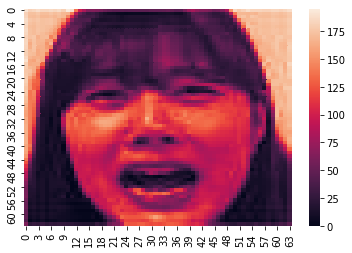

In [38]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][RF_best_p.predict(test_ext_p)[idx]])

## XGBoost

In [59]:
xgb = XGBClassifier(n_jobs=-1, random_state=1234, tree_method = 'gpu_hist')
parameters = {
    'n_estimators':[300,500,700,1000],
    'max_depth':[5,10,15,20],
    'learning_rate':[0.01,0.1,0.5,1,10]
}
n_iter_search = 10
xgb_rgs = RandomizedSearchCV(xgb, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

xgb_rgs.fit(train_ext_p, train_labels_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 44.9min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logisti...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           tree_method='gpu_hist',
                      

In [60]:
xgb_rgs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [61]:
xgb_rgs.best_score_

0.5392584447901525

In [63]:
xgb_best = xgb_rgs.best_estimator_

xgb_predictions = xgb_best.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, xgb_predictions)
print("XGB에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

XGB에서 RandomGridSearchCV로 찾은 결과 : 0.5725


In [64]:
# dump(xgb_best, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/xgb_best.pkl')

['drive/My Drive/Colab Notebooks/face_emtion_pkls/xgb_best.pkl']

In [39]:
xgb_best_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/xgb_best.pkl')
xgb_best_p

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, n_estimators=700, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [40]:
xgb_best_p.predict_proba(test_ext_p)[0]

array([8.0567265e-01, 4.3520246e-02, 5.5694416e-02, 1.1426911e-02,
       5.0375069e-04, 1.0889435e-02, 7.2292559e-02], dtype=float32)

In [67]:
xgb_best_p.predict(test_ext_p)[0]

0

In [41]:
xgb_predictions_p = xgb_best_p.predict(test_ext_p)
xgb_predictions_p

array([0, 0, 1, 1, 2, 0, 3, 6, 2, 6, 5, 0, 3, 2, 2, 0, 2, 5, 4, 1, 2, 2,
       5, 2, 0, 6, 2, 0, 2, 1, 0, 2, 5, 5, 0, 4, 6, 0, 3, 6, 0, 3, 5, 4,
       1, 6, 4, 5, 1, 6, 1, 1, 1, 0, 6, 2, 4, 2, 1, 4, 1, 2, 1, 2, 5, 5,
       3, 5, 2, 5, 4, 3, 6, 5, 3, 1, 5, 1, 6, 5, 5, 5, 1, 4, 4, 2, 0, 0,
       6, 5, 4, 1, 4, 0, 4, 5, 6, 1, 0, 6, 0, 5, 4, 1, 4, 4, 6, 5, 3, 1,
       2, 4, 4, 5, 5, 1, 0, 3, 6, 3, 4, 0, 5, 0, 2, 0, 2, 5, 0, 6, 4, 2,
       2, 1, 4, 1, 4, 5, 1, 4, 2, 0, 6, 0, 2, 5, 5, 6, 0, 2, 0, 6, 4, 5,
       4, 4, 2, 3, 3, 0, 6, 1, 3, 2, 3, 4, 6, 6, 5, 0, 3, 5, 1, 2, 1, 3,
       5, 4, 0, 3, 3, 5, 5, 1, 3, 1, 4, 5, 3, 0, 2, 4, 0, 1, 2, 5, 3, 4,
       5, 4, 4, 2, 2, 0, 0, 5, 1, 5, 6, 0, 0, 2, 4, 5, 5, 4, 0, 3, 3, 1,
       6, 3, 3, 6, 0, 4, 4, 4, 5, 0, 1, 3, 6, 3, 1, 1, 1, 3, 1, 3, 1, 0,
       6, 3, 1, 4, 2, 2, 1, 2, 4, 4, 2, 4, 2, 4, 1, 3, 3, 0, 3, 1, 1, 0,
       1, 4, 6, 2, 0, 5, 0, 3, 1, 6, 5, 3, 3, 1, 1, 0, 4, 6, 1, 1, 2, 5,
       0, 2, 1, 5, 2, 5, 5, 6, 4, 5, 3, 6, 6, 5, 2,

In [42]:
print('XGBoost 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == xgb_predictions_p)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

XGBoost 감정별 정답률
emotion ang :  0.5121951219512195
emotion dis :  0.4413793103448276
emotion fea :  0.5563380281690141
emotion hap :  0.7666666666666667
emotion neu :  0.6183206106870229
emotion sad :  0.5806451612903226
emotion sur :  0.5789473684210527


Real Label :  fea
Model Label :  ang


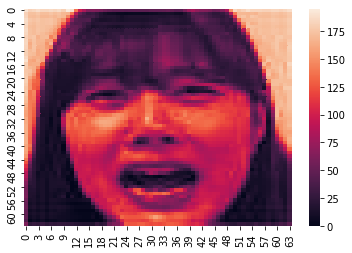

In [43]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][xgb_best_p.predict(test_ext_p)[idx]])

## LightGBM

In [46]:
lgbm = LGBMClassifier(n_jobs=-1, random_state=1234)
parameters = {
    'n_estimators':[300,500,700,1000],
    'max_depth':[5,10,15,20],
    'learning_rate':[0.01,0.1,0.5,1,10]
}
n_iter_search = 10
lgbm_rgs = RandomizedSearchCV(lgbm, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

lgbm_rgs.fit(train_ext_p, train_labels_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 33.8min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_...=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
              

In [47]:
lgbm_rgs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
lgbm_rgs.best_score_

0.5590939573326617

In [49]:
lgbm_best = lgbm_rgs.best_estimator_

lgbm_predictions = lgbm_best.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, lgbm_predictions)
print("LGBM에서 RandomGridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

LGBM에서 RandomGridSearchCV로 찾은 결과 : 0.6090


In [50]:
# dump(lgbm_best, 'drive/My Drive/Colab Notebooks/face_emtion_pkls/lgbm_best.pkl')

['drive/My Drive/Colab Notebooks/face_emtion_pkls/lgbm_best.pkl']

In [51]:
lgbm_best_p = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/lgbm_best.pkl')
lgbm_best_p

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [52]:
lgbm_best_p.predict_proba(test_ext_p)[0]

array([9.45656896e-01, 7.64934082e-03, 2.89643767e-02, 1.99784932e-03,
       2.18783531e-04, 1.38908946e-03, 1.41236640e-02])

In [53]:
lgbm_best_p.predict(test_ext_p)[0]

0

In [54]:
lgbm_predictions_p = lgbm_best_p.predict(test_ext_p)
lgbm_predictions_p

array([0, 0, 0, 1, 6, 1, 6, 6, 2, 6, 5, 0, 3, 2, 2, 0, 2, 5, 0, 3, 2, 2,
       4, 1, 0, 6, 2, 0, 0, 2, 0, 2, 5, 1, 0, 4, 6, 0, 3, 0, 0, 3, 4, 1,
       1, 6, 4, 5, 1, 6, 1, 1, 2, 0, 6, 5, 4, 2, 1, 4, 4, 4, 1, 1, 5, 5,
       3, 5, 2, 5, 4, 3, 6, 5, 3, 2, 5, 1, 6, 5, 5, 5, 1, 0, 4, 2, 0, 0,
       6, 2, 4, 1, 4, 0, 4, 5, 1, 1, 1, 6, 0, 5, 4, 1, 4, 1, 6, 5, 5, 1,
       2, 4, 4, 6, 5, 1, 0, 3, 6, 3, 4, 0, 2, 0, 2, 0, 2, 5, 0, 6, 6, 2,
       4, 1, 6, 1, 4, 5, 1, 4, 2, 0, 6, 0, 2, 5, 5, 6, 1, 2, 0, 6, 4, 5,
       0, 4, 1, 3, 3, 0, 6, 1, 3, 2, 3, 4, 6, 6, 5, 1, 3, 0, 1, 2, 5, 3,
       2, 4, 0, 3, 3, 5, 4, 0, 5, 0, 4, 5, 3, 0, 1, 4, 1, 1, 2, 3, 3, 6,
       5, 4, 4, 2, 2, 0, 0, 5, 1, 5, 6, 0, 0, 2, 6, 0, 5, 4, 0, 3, 3, 1,
       0, 3, 3, 2, 1, 4, 4, 4, 4, 0, 1, 3, 6, 3, 1, 1, 1, 3, 1, 3, 1, 0,
       6, 3, 1, 4, 6, 2, 1, 2, 4, 4, 2, 4, 2, 4, 1, 3, 3, 0, 3, 1, 1, 1,
       1, 4, 6, 2, 0, 0, 0, 3, 1, 6, 5, 3, 3, 1, 1, 0, 6, 6, 5, 1, 2, 5,
       0, 2, 1, 5, 2, 1, 5, 6, 4, 5, 3, 6, 6, 0, 2,

In [55]:
print('LightGBM 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == lgbm_predictions_p)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

LightGBM 감정별 정답률
emotion ang :  0.5670731707317073
emotion dis :  0.5724137931034483
emotion fea :  0.5633802816901409
emotion hap :  0.7833333333333333
emotion neu :  0.6030534351145038
emotion sad :  0.5806451612903226
emotion sur :  0.6240601503759399


Real Label :  fea
Model Label :  ang


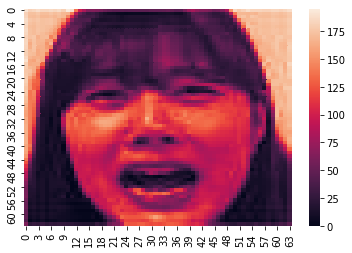

In [56]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][lgbm_best_p.predict(test_ext_p)[idx]])

# Voting Ensemble

In [0]:
from sklearn.ensemble import VotingClassifier

In [58]:
eclf = VotingClassifier(estimators = [('RF', RF_best_p),('XGB', xgb_best_p),('LGBM', lgbm_best_p)], voting = 'hard')


eclf.fit(train_ext_p, train_labels_p)
eclf_pred = eclf.predict(test_ext_p)
accuracy = accuracy_score(test_labels_p, eclf_pred)
print("Hard Voting 으로 찾은 결과 : {0:.4f}".format(accuracy))

Hard Voting 으로 찾은 결과 : 0.6131


In [59]:
# eclf_pred_p = eclf.predict(test_ext_p)

# dump(eclf_pred_p,'drive/My Drive/Colab Notebooks/face_emtion_pkls/eclf_pred_p.pkl')

['drive/My Drive/Colab Notebooks/face_emtion_pkls/eclf_pred_p.pkl']

In [0]:
eclf_pred_pk = load('C:/Users/howki/Python/Team Project/Mini Project - Emotion Classification EDA/Focus_face_ML/eclf_pred_p.pkl')

In [61]:
print('Voting 감정별 정답률')
for i in range(7):
    prob = sum((test_labels_p == i) & (test_labels_p == eclf_pred_pk)) / sum(test_labels_p == i)
    print("emotion " + emotion_df['emotion'][i] + " : ", prob)

Voting 감정별 정답률
emotion ang :  0.6036585365853658
emotion dis :  0.5379310344827586
emotion fea :  0.5633802816901409
emotion hap :  0.7916666666666666
emotion neu :  0.6183206106870229
emotion sad :  0.5806451612903226
emotion sur :  0.6240601503759399


Real Label :  fea
Model Label :  ang


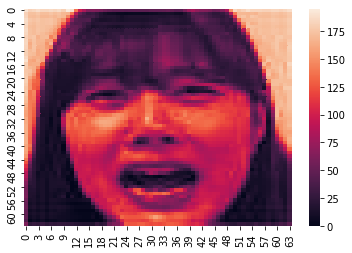

In [62]:
idx = 0
# 보고자 하는 데이터의 index
image_data = test_data_p[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
print("Real Label : ",emotion_df['emotion'][test_labels_p[idx]])
print("Model Label : ",emotion_df['emotion'][eclf_pred_pk[idx]])
